Machine learning project for predicting alcohol levels in wine using PyCaret.

Developed by Fernanda Battig

Data Setup - Set up the data for regression analysis with PyCaret

In [102]:
# Step 1 (Setup) using Functional API

# Import required libraries
from pycaret.regression import *
import pandas as pd

# Load the dataset
file_path = r'/Users/fernandabattig/Desktop/winequality-white.csv'
data = pd.read_csv(file_path, sep=';')  # Ensure correct delimiter is used

# Initialize PyCaret's regression setup
regression_setup = setup(
    data=data,
    target='alcohol',  # The target variable for regression
    session_id=42,  # For reproducibility
    normalize=True,  # Normalize the data
    verbose=True   # Show detailed outputs
)


,Description,Value
0,Session id,42
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


Model Comparison

In [103]:
# Step 2 (Compare Models) 

# Compare baseline models
best = compare_models()

catboost_model = create_model('catboost')  # Creating the CatBoost Regressor model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2092,0.0800,0.2829,0.9459,0.0242,0.0198
1,0.2238,0.0886,0.2977,0.9453,0.0252,0.0210
2,0.2184,0.0813,0.2850,0.9437,0.0250,0.0210
3,0.2208,0.0984,0.3137,0.9327,0.0271,0.0209
4,0.2231,0.0881,0.2968,0.9419,0.0260,0.0213
5,0.2248,0.0955,0.3090,0.9366,0.0268,0.0214
6,0.2285,0.1282,0.3580,0.9157,0.0304,0.0215
7,0.2381,0.1027,0.3205,0.9379,0.0273,0.0224
8,0.2314,0.0972,0.3118,0.9329,0.0267,0.0219


Model Analysis 

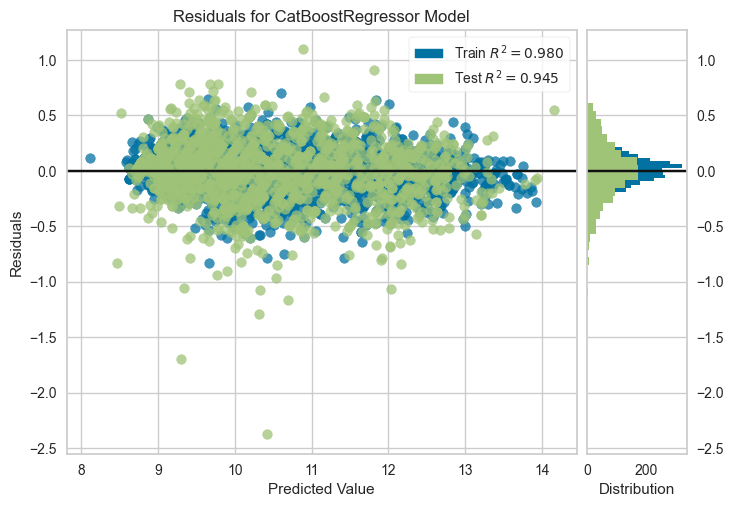

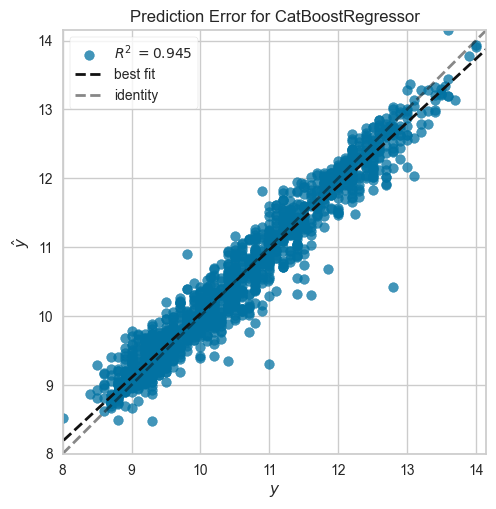

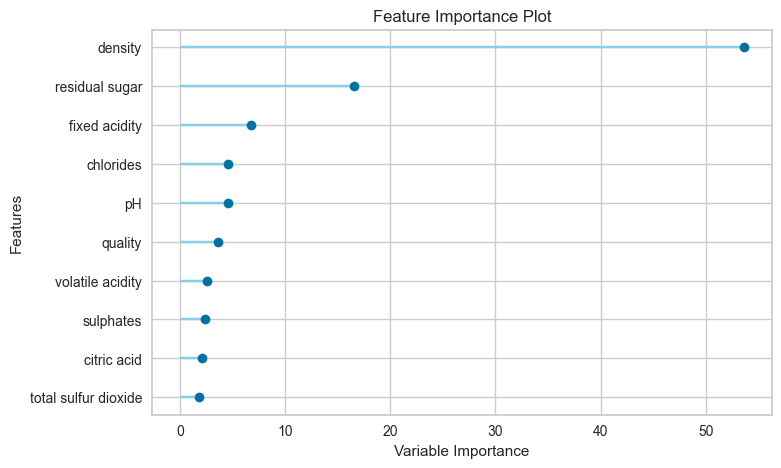

Help on function plot_model in module pycaret.regression.functional:

plot_model(estimator, plot: str = 'residuals', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    
    Example
    --------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.regression import *
    >>> exp_name = setup(data = boston,  target = 'medv')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'residual')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'residual'
        List of available plots (ID - Name):
    
       

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [104]:
# Step 3 (Analyze the Model) 

# Plot residuals to analyze the distribution of residuals
plot_model(best, plot='residuals')

# Plot error to evaluate prediction errors
plot_model(best, plot='error')

# Plot feature importance to understand key predictors
plot_model(best, plot='feature')

# Check available plots in plot_model
help(plot_model)

# Evalute the model
evaluate_model(best)


In [105]:
# Step 4 (Prediction)

# Predict on the test set
holdout_pred = predict_model(best)

# Display the first few rows of the predictions
print("Predictions on the test set:")
holdout_pred.head()

# Predict on an unseen dataset
# Create a copy of the original data and drop the target column ('alcohol')
new_data = data.copy()
new_data.drop('alcohol', axis=1, inplace=True)

# Perform prediction on the new dataset
predictions = predict_model(best, data=new_data)

# Display the first few rows of predictions
print("Predictions on unseen data:")
predictions.head()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.2157,0.0843,0.2903,0.9445,0.0252,0.0206


Predictions on the test set:


Predictions on unseen data:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,prediction_label
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.0010,3.00,0.45,6,8.802069
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,6,9.549160
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,6,10.363696
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,6,9.961705
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,6,9.961705


Saving the Model Pipeline 

In [106]:
#Step 5 (Save Model)

# Save the trained pipeline
save_model(best, 'my_first_pipeline')

# Load the saved pipeline
loaded_best_pipeline = load_model('my_first_pipeline')

# Display the loaded pipeline
print(loaded_best_pipeline)



Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/var/folders/cq/zsdgwsdd3yd4spvr8_pw3ndc0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=StandardScal

Tree-Based Model Comparison
Blending, and Stacking top 3 models for further optimization and comparison

Tree-Based Model Comparison

In [107]:
# Compare only tree-based models
compare_tree_models = compare_models(include=['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])

# Display the best tree-based model
print("Best tree-based model:")
print(compare_tree_models)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2260,0.0964,0.3099,0.9359,0.0267,0.0215,0.5940
lightgbm,Light Gradient Boosting Machine,0.2464,0.1133,0.3359,0.9247,0.0289,0.0234,0.8250
xgboost,Extreme Gradient Boosting,0.2364,0.1198,0.3452,0.9204,0.0296,0.0223,0.0640
et,Extra Trees Regressor,0.2322,0.1287,0.3580,0.9144,0.0307,0.0219,0.2430
rf,Random Forest Regressor,0.2507,0.1301,0.3598,0.9135,0.0309,0.0237,0.4050
gbr,Gradient Boosting Regressor,0.3044,0.1570,0.3955,0.8956,0.0342,0.0290,0.1770
dt,Decision Tree Regressor,0.3277,0.2846,0.5320,0.8113,0.0456,0.0308,0.0200


Best tree-based model:


In [108]:
# Pull the scoring results for tree-based models
compare_tree_models_results = pull()

# Display the scoring grid
print(compare_tree_models_results)


                                    Model     MAE     MSE    RMSE      R2  \
catboost               CatBoost Regressor  0.2260  0.0964  0.3099  0.9359   
lightgbm  Light Gradient Boosting Machine  0.2464  0.1133  0.3359  0.9247   
xgboost         Extreme Gradient Boosting  0.2364  0.1198  0.3452  0.9204   
et                  Extra Trees Regressor  0.2322  0.1287  0.3580  0.9144   
rf                Random Forest Regressor  0.2507  0.1301  0.3598  0.9135   
gbr           Gradient Boosting Regressor  0.3044  0.1570  0.3955  0.8956   
dt                Decision Tree Regressor  0.3277  0.2846  0.5320  0.8113   

           RMSLE    MAPE  TT (Sec)  
catboost  0.0267  0.0215     0.594  
lightgbm  0.0289  0.0234     0.825  
xgboost   0.0296  0.0223     0.064  
et        0.0307  0.0219     0.243  
rf        0.0309  0.0237     0.405  
gbr       0.0342  0.0290     0.177  
dt        0.0456  0.0308     0.020  


Blend Models

In [109]:
from pycaret.regression import blend_models

# Retrieve the top 3 models from the compare_models step
best_mae_models_top3 = compare_models(sort='MAE', n_select=3)

# Blend the top 3 models
blended_model = blend_models(best_mae_models_top3)

# Display metrics for the blended model
print("Blended Model Metrics:")
print(pull())  # Display scoring grid for blended model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2098,0.0934,0.3056,0.9368,0.0259,0.0196
1,0.2277,0.0976,0.3125,0.9398,0.0264,0.0213
2,0.1997,0.0760,0.2757,0.9474,0.0240,0.0191
3,0.2085,0.0998,0.3160,0.9317,0.0272,0.0197
4,0.2158,0.0898,0.2996,0.9408,0.0262,0.0206
5,0.2088,0.0968,0.3111,0.9357,0.0269,0.0198
6,0.2170,0.1295,0.3598,0.9148,0.0306,0.0204
7,0.2282,0.1050,0.3240,0.9366,0.0275,0.0214
8,0.2168,0.0975,0.3122,0.9327,0.0267,0.0205


Blended Model Metrics:
         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.2098  0.0934  0.3056  0.9368  0.0259  0.0196
1     0.2277  0.0976  0.3125  0.9398  0.0264  0.0213
2     0.1997  0.0760  0.2757  0.9474  0.0240  0.0191
3     0.2085  0.0998  0.3160  0.9317  0.0272  0.0197
4     0.2158  0.0898  0.2996  0.9408  0.0262  0.0206
5     0.2088  0.0968  0.3111  0.9357  0.0269  0.0198
6     0.2170  0.1295  0.3598  0.9148  0.0306  0.0204
7     0.2282  0.1050  0.3240  0.9366  0.0275  0.0214
8     0.2168  0.0975  0.3122  0.9327  0.0267  0.0205
9     0.2378  0.1173  0.3424  0.9173  0.0300  0.0228
Mean  0.2170  0.1003  0.3159  0.9333  0.0271  0.0205
Std   0.0108  0.0139  0.0218  0.0096  0.0018  0.0010


Stack Models

In [110]:
from pycaret.regression import stack_models

# Retrieve the top 3 models (already done previously)
best_mae_models_top3 = compare_models(sort='MAE', n_select=3)

# Stack the models with default meta-model
stacked_model = stack_models(best_mae_models_top3)

# Display metrics for the stacked model
print("Stacked Model Metrics:")
stacked_results = pull()
print(stacked_results)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2044,0.0783,0.2797,0.9471,0.0239,0.0193
1,0.2186,0.0877,0.2961,0.9459,0.0251,0.0205
2,0.2130,0.0778,0.2789,0.9461,0.0244,0.0204
3,0.2183,0.0986,0.3141,0.9325,0.0271,0.0206
4,0.2201,0.0859,0.2931,0.9433,0.0257,0.0210
5,0.2174,0.0934,0.3055,0.9380,0.0265,0.0207
6,0.2234,0.1255,0.3543,0.9174,0.0301,0.0210
7,0.2312,0.1001,0.3163,0.9395,0.0270,0.0218
8,0.2244,0.0942,0.3069,0.9350,0.0263,0.0212


Stacked Model Metrics:
         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.2044  0.0783  0.2797  0.9471  0.0239  0.0193
1     0.2186  0.0877  0.2961  0.9459  0.0251  0.0205
2     0.2130  0.0778  0.2789  0.9461  0.0244  0.0204
3     0.2183  0.0986  0.3141  0.9325  0.0271  0.0206
4     0.2201  0.0859  0.2931  0.9433  0.0257  0.0210
5     0.2174  0.0934  0.3055  0.9380  0.0265  0.0207
6     0.2234  0.1255  0.3543  0.9174  0.0301  0.0210
7     0.2312  0.1001  0.3163  0.9395  0.0270  0.0218
8     0.2244  0.0942  0.3069  0.9350  0.0263  0.0212
9     0.2409  0.1087  0.3297  0.9233  0.0288  0.0231
Mean  0.2212  0.0950  0.3075  0.9368  0.0265  0.0210
Std   0.0094  0.0137  0.0218  0.0095  0.0018  0.0009


Interpret Model - Use SHAP plots to interpret CatBoost and explain its decisions.

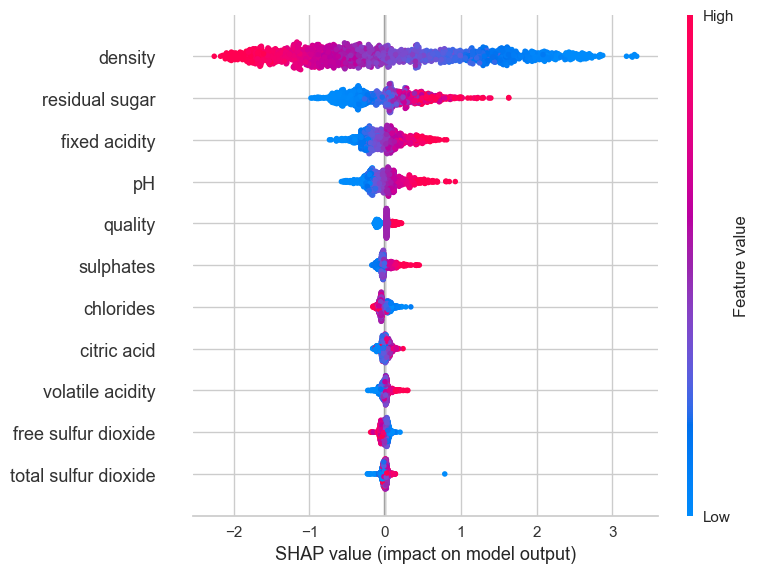

In [111]:
from pycaret.regression import create_model, interpret_model


catboost = create_model('catboost')

# SHAP Summary Plot - Global Interpretation
interpret_model(catboost, plot='summary')

# SHAP Reason Plot - Local Interpretation for a specific observation
interpret_model(catboost, plot='reason', observation=1)



Finaliizing Catboost Model - Test the final CatBoost model on unseen data to confirm generalizability

In [112]:
from pycaret.regression import save_model

# Save the CatBoost pipeline
save_model(best_model, 'final_catboost_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleIm...
                                                              interaction_constraints=None,
                                                              learning_rate=None,
                                                              max_bin=None,
    

In [113]:
import pandas as pd
from pycaret.regression import load_model, predict_model

# Load the saved model
loaded_model = load_model('final_catboost_model')

# Load the unseen data from the CSV file
unseen_data = pd.read_csv('synthetic_unseen_data.csv')

# Make predictions on the unseen data
predictions = predict_model(loaded_model, data=unseen_data)

# Display the predictions
print(predictions)


Transformation Pipeline and Model Successfully Loaded


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.5              0.30         0.35       14.000000      0.050   
1            7.0              0.27         0.36       20.700001      0.045   
2            7.2              0.25         0.32        8.900000      0.046   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 40.0                 183.0    0.998  3.01       0.50   
1                 45.0                 170.0    1.001  3.00       0.45   
2                 35.0                 160.0    0.995  3.10       0.48   

   quality  prediction_label  
0        6          9.379628  
1        6          9.255156  
2        5         12.624699  


Further Optimization with Hyperparameter Tuning

In [114]:
from pycaret.regression import tune_model

# Tune the CatBoost model
tuned_model = tune_model(best_model, optimize='MAE')
print(tuned_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2044,0.0783,0.2797,0.9471,0.0239,0.0193
1,0.2186,0.0877,0.2961,0.9459,0.0251,0.0205
2,0.2130,0.0778,0.2789,0.9461,0.0244,0.0204
3,0.2183,0.0986,0.3141,0.9325,0.0271,0.0206
4,0.2201,0.0859,0.2931,0.9433,0.0257,0.0210
5,0.2174,0.0934,0.3055,0.9380,0.0265,0.0207
6,0.2234,0.1255,0.3543,0.9174,0.0301,0.0210
7,0.2312,0.1001,0.3163,0.9395,0.0270,0.0218
8,0.2244,0.0942,0.3069,0.9350,0.0263,0.0212


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x13a53c280>),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1, random_state=42)),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu',
                                            e...
                       

In [115]:
# Make predictions using the tuned model
tuned_predictions = predict_model(tuned_model, data=unseen_data)

# Display the tuned predictions
print(tuned_predictions)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.5              0.30         0.35       14.000000      0.050   
1            7.0              0.27         0.36       20.700001      0.045   
2            7.2              0.25         0.32        8.900000      0.046   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 40.0                 183.0    0.998  3.01       0.50   
1                 45.0                 170.0    1.001  3.00       0.45   
2                 35.0                 160.0    0.995  3.10       0.48   

   quality  prediction_label  
0        6          9.028602  
1        6          8.769270  
2        5         10.165512  


In [116]:
save_model(tuned_model, 'final_tuned_catboost_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleIm...
                                                              interaction_constraints=None,
                                                              learning_rate=None,
                                                              max_bin=None,
    